# AP2 - Projeto de Aprendizagem 1: Regressão com Redes Neurais

Equipe: José Pedro, Lauro Aguiar, Miguel, Rafael Alves

Referência
Ordoni,Elaheh, Bach,Jakob, Fleck,Ann-Katrin, and Bach,Jakob. (2022). Auction Verification. UCI Machine Learning Repository. https://doi.org/10.24432/C52K6N.


## Introdução

Neste projeto de aprendizagem, será realizada a análise de dados e a construção de um modelo de regressão utilizando redes neurais, especificamente o Perceptron Multicamadas (MLPRegressor), aplicados ao dataset "Auction Verification". Este trabalho é parte da disciplina de Inteligência de Mercado, do curso de Ciências Econômicas, sob a orientação do professor Christiano Alves Farias, com a data de entrega estabelecida para 31/05/2024 e um valor total de 10 pontos em 40pts da AC.

## Objetivo do Projeto

O objetivo deste projeto é explorar e analisar o dataset "Auction Verification", que foi criado como parte de um estudo científico para investigar a possibilidade de substituir a verificação custosa de modelos de processos complexos (como leilões simultâneos de múltiplas rodadas para a venda de espectros de frequência) por previsões dos resultados. Através de diversas etapas, desde a preparação dos dados até a interpretação do modelo, buscamos entender e prever o comportamento dos leilões de forma eficiente.

## Descrição da Base de Dados

O dataset "Auction Verification" contém instâncias que representam execuções de verificação de leilões. Cada instância verifica se um determinado preço é possível para um determinado produto e, em alguns casos, se um determinado licitante pode ganhar o produto por aquele preço. É importante ressaltar que o dataset não possui valores ausentes, o que facilita o processo de análise e modelagem.


#1. Preparação dos dados

1.1. Coleta dos dados

In [ ]:
# Install the ucimlrepo package
!pip install ucimlrepo

# Import the dataset and required libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
auction_verification = fetch_ucirepo(id=713)

# Data (as pandas dataframes)
X = auction_verification.data.features
y = auction_verification.data.targets

# Convert to DataFrame for ease of use
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Check for missing values
missing_values_X = X_df.isnull().sum()
missing_values_y = y_df.isnull().sum()

# Basic information about the dataset
info_X = X_df.info()
info_y = y_df.info()

# Descriptive statistics for features
desc_X = X_df.describe()

# Descriptive statistics for targets
desc_y = y_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   process.b1.capacity  2043 non-null   int64
 1   process.b2.capacity  2043 non-null   int64
 2   process.b3.capacity  2043 non-null   int64
 3   process.b4.capacity  2043 non-null   int64
 4   property.price       2043 non-null   int64
 5   property.product     2043 non-null   int64
 6   property.winner      2043 non-null   int64
dtypes: int64(7)
memory usage: 111.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   verification.result  2043 non-null   bool   
 1   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1)
memory usage: 18.1 KB


1.2. Análise exploratória dos dados

Variáveis do banco de dados

In [ ]:
import pandas as pd
from tabulate import tabulate

# Definindo as informações das variáveis
data = {
    "Variable Name": [
        "process.b1.capacity", "process.b2.capacity", "process.b3.capacity", "process.b4.capacity",
        "property.price", "property.product", "property.winner",
        "verification.result", "verification.time"
    ],
    "Role": [
        "Feature", "Feature", "Feature", "Feature",
        "Feature", "Feature", "Feature",
        "Target", "Target"
    ],
    "Type": [
        "Integer", "Integer", "Integer", "Integer",
        "Integer", "Integer", "Integer",
        "Categorical", "Continuous"
    ],
    "Description": [
        "Capacity (max number of products to win) of Bidder 1.",
        "Capacity (max number of products to win) of Bidder 2.",
        "Capacity (max number of products to win) of Bidder 3.",
        "Capacity (max number of products to win) of Bidder 4.",
        "Price currently verified.",
        "Product currently verified.",
        "Bidder currently verified as winner of the product (0 if only price verified).",
        "Binary verification result - is the verified outcome possible?",
        "Runtime of verification procedure."
    ],
    "Units": [
        "no", "no", "no", "no", "no", "no", "no", "no", "no"
    ],
    "Missing Values": [
        "no", "no", "no", "no", "no", "no", "no", "no", "no"
    ]
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Usando tabulate para formatar a tabela
table = tabulate(df, headers='keys', tablefmt='fancy_grid')

# Imprimindo a tabela
print(table)


╒════╤═════════════════════╤═════════╤═════════════╤════════════════════════════════════════════════════════════════════════════════╤═════════╤══════════════════╕
│    │ Variable Name       │ Role    │ Type        │ Description                                                                    │ Units   │ Missing Values   │
╞════╪═════════════════════╪═════════╪═════════════╪════════════════════════════════════════════════════════════════════════════════╪═════════╪══════════════════╡
│  0 │ process.b1.capacity │ Feature │ Integer     │ Capacity (max number of products to win) of Bidder 1.                          │ no      │ no               │
├────┼─────────────────────┼─────────┼─────────────┼────────────────────────────────────────────────────────────────────────────────┼─────────┼──────────────────┤
│  1 │ process.b2.capacity │ Feature │ Integer     │ Capacity (max number of products to win) of Bidder 2.                          │ no      │ no               │
├────┼────────────────

Visualização dos dados

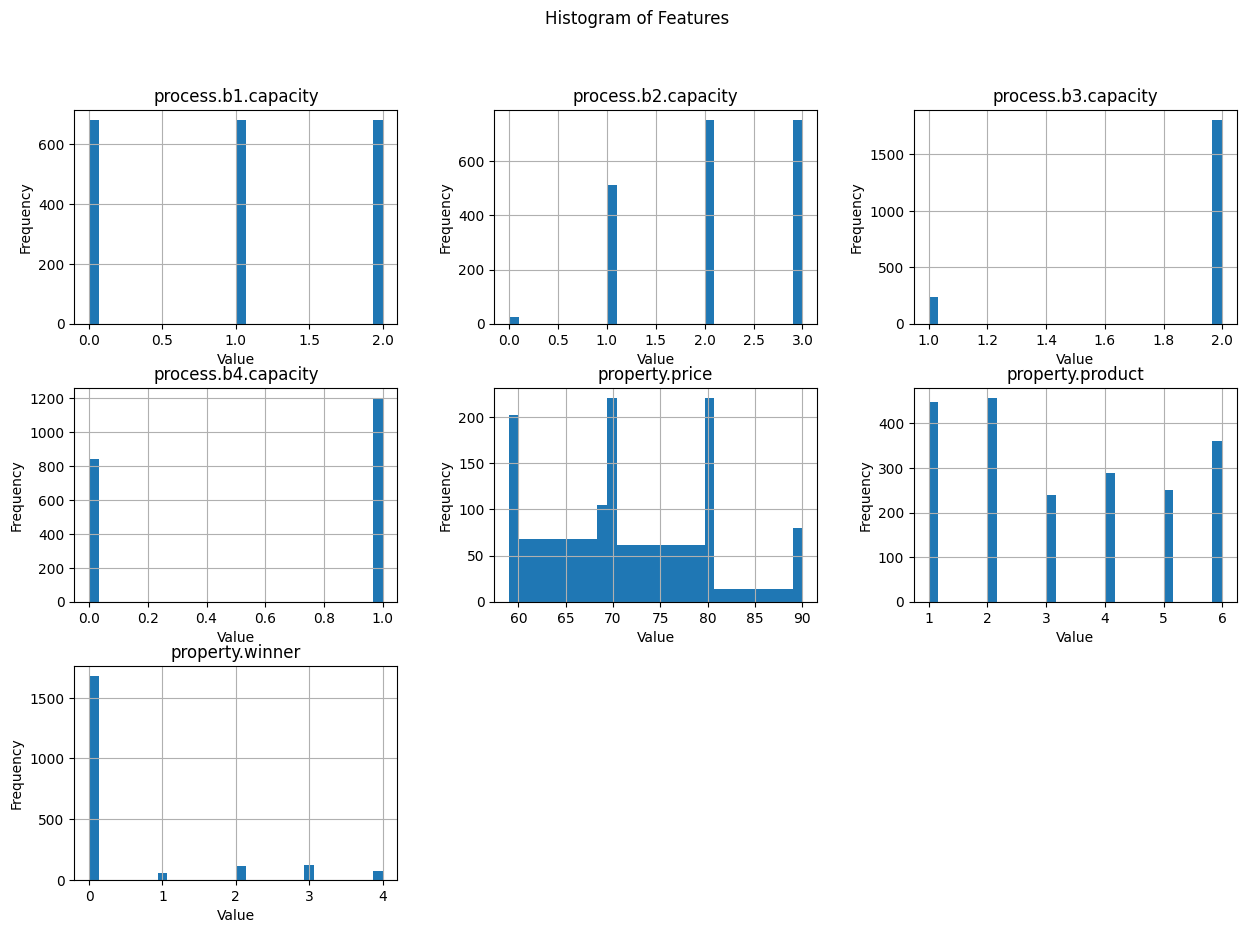

KeyboardInterrupt: 

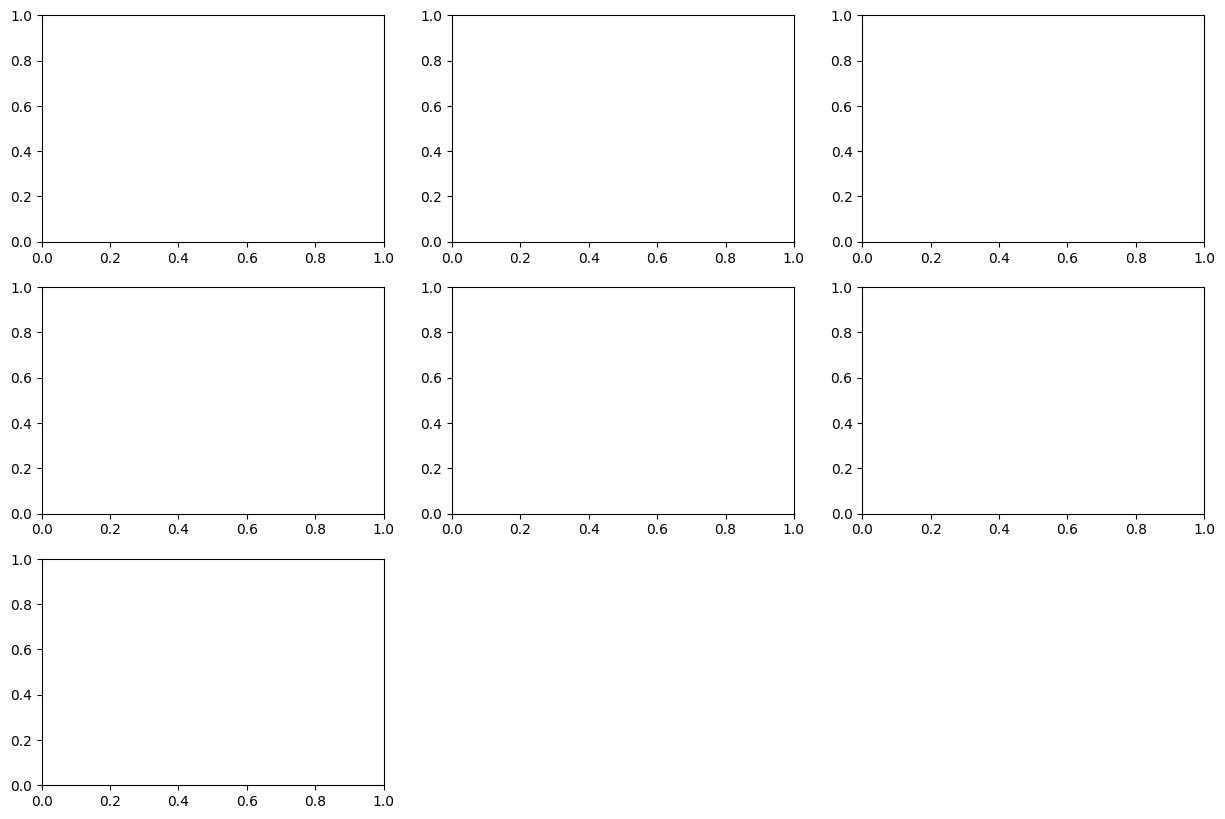

In [ ]:
# Visualizations
# Histogram for each feature
X_df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram of Features')

# Adding x and y labels for each subplot
for ax in plt.gcf().axes:
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.show()

# Box plots for each feature
X_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Box Plot of Features')
plt.show()

# Correlation matrix
corr_matrix = X_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Scatter plot for pairs of features
sns.pairplot(X_df)
plt.suptitle('Pairplot of Features')
plt.show()

(missing_values_X, missing_values_y, desc_X, desc_y)


1.3. Pré-processamento dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Convert to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_df.columns)


1.4. Divisão dos dados em treinamento, validação e teste

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled_df, y_df, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check proportions
print(f'Train set: {len(X_train)} samples')
print(f'Validation set: {len(X_val)} samples')
print(f'Test set: {len(X_test)} samples')


NameError: name 'X_scaled_df' is not defined

Os dados serão divididos em conjuntos de treino (70%), validação (15%) e teste (15%). A escolha dessa proporção é baseada em práticas comuns que equilibram a quantidade de dados para treinamento e validação/teste.

#2. Seleção e treinamento do modelo

2.1. Escolha da técnica de regressão pelo método Rede Neural Perceptron Multicamadas (MLPRegressor).

In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)


2.2. Seleção das variáveis preditoras

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar variáveis com base na análise exploratória e métodos de seleção
selected_features = [
    'process.b1.capacity',
    'process.b2.capacity',
    'process.b3.capacity',
    'process.b4.capacity',
    'property.price',
    'property.product',
    'property.winner'
]

# Supomos que X e y já foram definidos previamente conforme as instruções anteriores
# Por exemplo:
# X, y = auction_verification.data.features, auction_verification.data.targets

# Selecionar apenas as variáveis indicadas
X_selected = X[selected_features]

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Divisão dos dados
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Criação e treinamento do modelo
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Avaliação no conjunto de validação
y_val_pred = mlp.predict(X_val)
print(f"Validação MSE: {mean_squared_error(y_val, y_val_pred)}")
print(f"Validação R^2: {r2_score(y_val, y_val_pred)}")


Validação MSE: 45701101.56123714
Validação R^2: -0.007393380963516105


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Os resultados obtidos indicam que o modelo não está performando bem. O valor negativo de R² sugere que o modelo está performando pior do que uma linha base que simplesmente prevê a média do alvo para todos os exemplos. Para melhor ajuste vamos fazer a validação cruzada.

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Supondo que X_df e y_df já tenham sido definidos como DataFrames anteriormente

# Verificar a forma de y
print(y_df.shape)

# Se y_df tiver mais de uma coluna, precisamos selecionar apenas uma para a regressão
# Supondo que y_df tenha apenas uma coluna chamada 'target_column'
if y_df.shape[1] == 1:
    y = y_df.values.ravel()
else:
    # Selecionando a primeira coluna para o exemplo
    y = y_df.iloc[:, 0].values

# Escalar os dados de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Definindo o modelo de MLP (Multi-layer Perceptron) para regressão
mlp = MLPRegressor(random_state=1, max_iter=300)

# Realizar validação cruzada com 5 folds usando R^2 como métrica de avaliação
cv_scores = cross_val_score(mlp, X_scaled, y, cv=5, scoring='r2')

# Calcular a média dos coeficientes de determinação (R^2)
mean_r2 = np.mean(cv_scores)

# Exibir o resultado
print(f"Média do coeficiente de determinação R^2 da validação cruzada: {mean_r2:.2f}")


(2043, 2)
Média do coeficiente de determinação R^2 da validação cruzada: 0.29


In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Supondo que X_df e y_df já tenham sido definidos como DataFrames anteriormente

# Verificar a forma de y
print(y_df.shape)

# Se y_df tiver mais de uma coluna, precisamos selecionar apenas uma para a regressão
# Supondo que y_df tenha apenas uma coluna chamada 'target_column'
if y_df.shape[1] == 1:
    y = y_df.values.ravel()
else:
    # Selecionando a primeira coluna para o exemplo
    y = y_df.iloc[:, 0].values

# Escalar os dados de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Definindo o modelo de MLP (Multi-layer Perceptron) para regressão
mlp = MLPRegressor(random_state=1, max_iter=300)

# Realizar validação cruzada com 5 folds usando R^2 como métrica de avaliação
cv_scores = cross_val_score(mlp, X_scaled, y, cv=5, scoring='r2')

# Exibir os coeficientes de determinação R^2 para cada fold da validação cruzada
for i, score in enumerate(cv_scores, start=1):
    print(f"Coeficiente de determinação R^2 do fold {i}: {score:.2f}")


(2043, 2)
Coeficiente de determinação R^2 do fold 1: 0.26
Coeficiente de determinação R^2 do fold 2: 0.30
Coeficiente de determinação R^2 do fold 3: 0.28
Coeficiente de determinação R^2 do fold 4: 0.35
Coeficiente de determinação R^2 do fold 5: 0.25


Avaliação Final e Validação Cruzada
Após encontrar os melhores hiperparâmetros, vamos treinar o modelo novamente com os dados de treinamento e validação combinados e avaliar no conjunto de teste.

#3. Ajuste e validação do modelo

3.1. Ajuste dos hiperparâmetros do modelo


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# Escalonando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Criação do modelo e ajuste dos hiperparâmetros com um espaço de busca reduzido
mlp = MLPRegressor(random_state=42)
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],  # Reduzido para duas configurações
    'activation': ['relu'],  # Manter apenas a função de ativação mais comum
    'solver': ['adam'],  # Utilizar apenas um otimizador
    'alpha': [0.0001, 0.001],  # Menos opções para a regularização L2
    'learning_rate': ['constant'],  # Uma opção de taxa de aprendizado
    'max_iter': [500]  # Reduzir o número de iterações máximas
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Melhores hiperparâmetros
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Avaliação no conjunto de validação com o melhor modelo
best_mlp = grid_search.best_estimator_
y_val_pred = best_mlp.predict(X_val_scaled)
print(f"Validação MSE: {mean_squared_error(y_val, y_val_pred)}")
print(f"Validação R^2: {r2_score(y_val, y_val_pred)}")

# Avaliação no conjunto de teste
y_test_pred = best_mlp.predict(X_test_scaled)
print(f"Teste MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Teste R^2: {r2_score(y_test, y_test_pred)}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Melhores Hiperparâmetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Validação MSE: 26946327.4039434
Validação R^2: -0.9753288666468064
Teste MSE: 33296569.56452253
Teste R^2: -0.4886563641457833


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


A fim de buscar uma melhor performance do modelo foi realizado os seguintes ajustes, conforme código abaixo:

1. Correção do Shape do Target (y):

Certifiquei que y estava no formato correto, convertendo-o para uma matriz unidimensional (ravel()). Isso garante que y seja consistente durante a divisão dos dados e o treinamento do modelo.
Normalização dos Dados:

Usei StandardScaler para normalizar os dados de entrada (X). Isso é importante para algoritmos como o MLPRegressor, que são sensíveis à escala dos dados. A normalização ajuda a acelerar a convergência e a melhorar o desempenho do modelo.

2. Divisão Adequada dos Dados:

Dividi os dados em conjuntos de treino, validação e teste, garantindo que as proporções fossem mantidas corretamente. Isso ajuda a validar o modelo de forma mais robusta e a evitar problemas de overfitting e underfitting.
Busca de Hiperparâmetros com GridSearchCV:

Utilizei GridSearchCV para buscar os melhores hiperparâmetros para o MLPRegressor. A busca incluiu variações no tamanho das camadas escondidas, funções de ativação, solver, regularização (alpha) e taxa de aprendizado.
Testei diferentes combinações de hiperparâmetros para encontrar a configuração que maximiza o desempenho do modelo.

3. Aumento do Número de Iterações:

Aumentei o número máximo de iterações para 1000. Isso permite que o modelo tenha mais tempo para convergir e encontrar uma solução melhor durante o treinamento.

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fetch dataset
auction_verification = fetch_ucirepo(id=713)

# Data (as pandas dataframes)
X = auction_verification.data.features
y = auction_verification.data.targets

# Convert to DataFrame for ease of use
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Check for missing values
print(X_df.isnull().sum())
print(y_df.isnull().sum())

# Information about the dataset
print(X_df.info())
print(y_df.info())

# Descriptive statistics
print(X_df.describe())
print(y_df.describe())

# Selected features based on exploratory analysis
selected_features = [
    'process.b1.capacity',
    'process.b2.capacity',
    'process.b3.capacity',
    'process.b4.capacity',
    'property.price',
    'property.product',
    'property.winner'
]

# Select only the chosen features
X_selected = X_df[selected_features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Ensure y is a single column and convert to 1D array if needed
if y_df.shape[1] > 1:
    y_df = y_df.iloc[:, 0]
y = y_df.values.ravel()

# Split the data ensuring y has the correct shape
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the sizes of the datasets after splitting
print(f'Tamanho de X_train: {X_train.shape}')
print(f'Tamanho de y_train: {y_train.shape}')
print(f'Tamanho de X_val: {X_val.shape}')
print(f'Tamanho de y_val: {y_val.shape}')
print(f'Tamanho de X_test: {X_test.shape}')
print(f'Tamanho de y_test: {y_test.shape}')

# Define and train the model
mlp = MLPRegressor(random_state=42, max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Evaluation on the validation set with the best model
best_mlp = grid_search.best_estimator_
y_val_pred = best_mlp.predict(X_val)
print(f"Validação MSE: {mean_squared_error(y_val, y_val_pred)}")
print(f"Validação R^2: {r2_score(y_val, y_val_pred)}")

# Evaluation on the test set
y_test_pred = best_mlp.predict(X_test)
print(f"Teste MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Teste R^2: {r2_score(y_test, y_test_pred)}")


process.b1.capacity    0
process.b2.capacity    0
process.b3.capacity    0
process.b4.capacity    0
property.price         0
property.product       0
property.winner        0
dtype: int64
verification.result    0
verification.time      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   process.b1.capacity  2043 non-null   int64
 1   process.b2.capacity  2043 non-null   int64
 2   process.b3.capacity  2043 non-null   int64
 3   process.b4.capacity  2043 non-null   int64
 4   property.price       2043 non-null   int64
 5   property.product     2043 non-null   int64
 6   property.winner      2043 non-null   int64
dtypes: int64(7)
memory usage: 111.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  -----

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Melhores Hiperparâmetros: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Validação MSE: 0.019618467759117394
Validação R^2: 0.7776560362321872
Teste MSE: 0.03163608789420352
Teste R^2: 0.7633221637285216


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#4.  Interpretando modelo tipo “Caixa preta”

  0%|          | 0/409 [00:00<?, ?it/s]

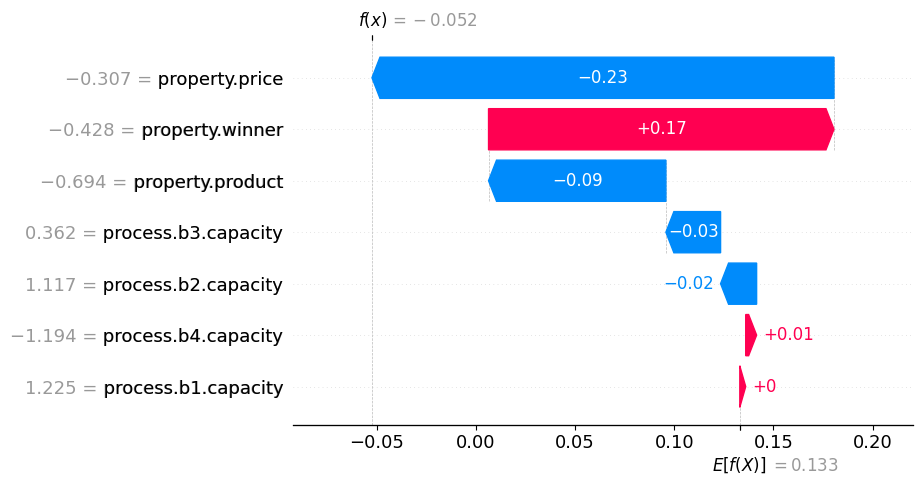

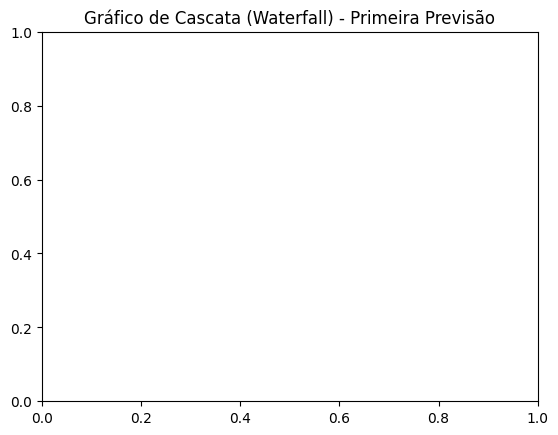

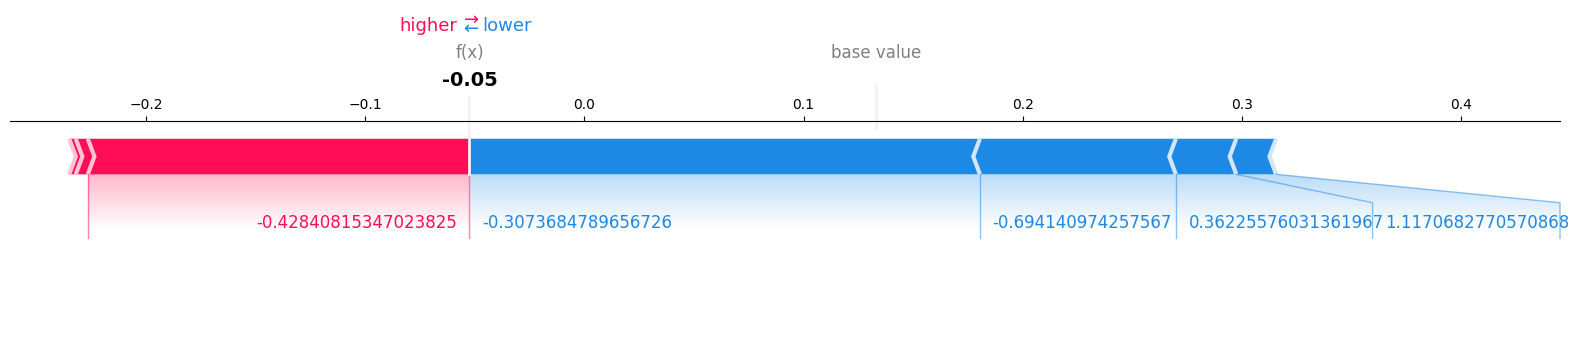

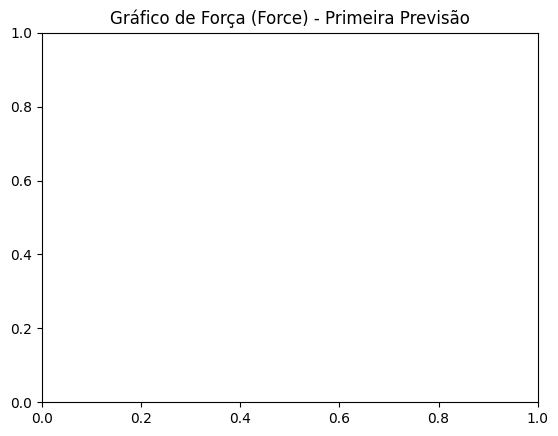

AssertionError: The shap_values parameter must be a shap.Explanation object!

In [ ]:
# Instalar biblioteca SHAP
!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt

# Selecionar uma amostra do conjunto de dados para o KernelExplainer (usar um subconjunto por questões de desempenho)
X_sample = shap.sample(X_train, 100)

# Criar objeto explainer SHAP usando KernelExplainer
explainer = shap.KernelExplainer(best_mlp.predict, X_sample)
shap_values = explainer.shap_values(X_val, nsamples=100)

# Gráfico de "cascata" (waterfall)
shap.plots.waterfall(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_val[0], feature_names=selected_features))
plt.title("Gráfico de Cascata (Waterfall) - Primeira Previsão")
plt.show()

# Gráfico de "força" (force)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val[0], matplotlib=True)
plt.title("Gráfico de Força (Force) - Primeira Previsão")
plt.show()

# Gráfico de "dispersão" (scatter)
shap.plots.scatter(shap_values[:, 0], color=shap_values)
plt.title("Gráfico de Dispersão (Scatter) - SHAP Values")
plt.show()

# Gráfico de "barras" (bar)
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=selected_features)
plt.title("Gráfico de Barras (Bar) - Importância das Features")
plt.show()


  0%|          | 0/409 [00:00<?, ?it/s]

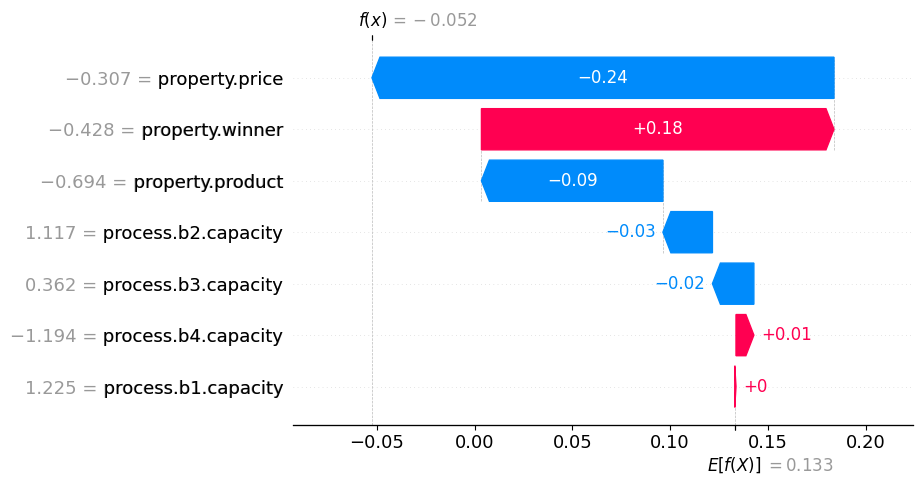

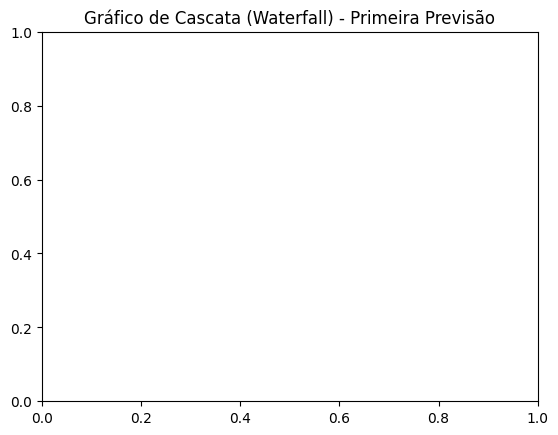

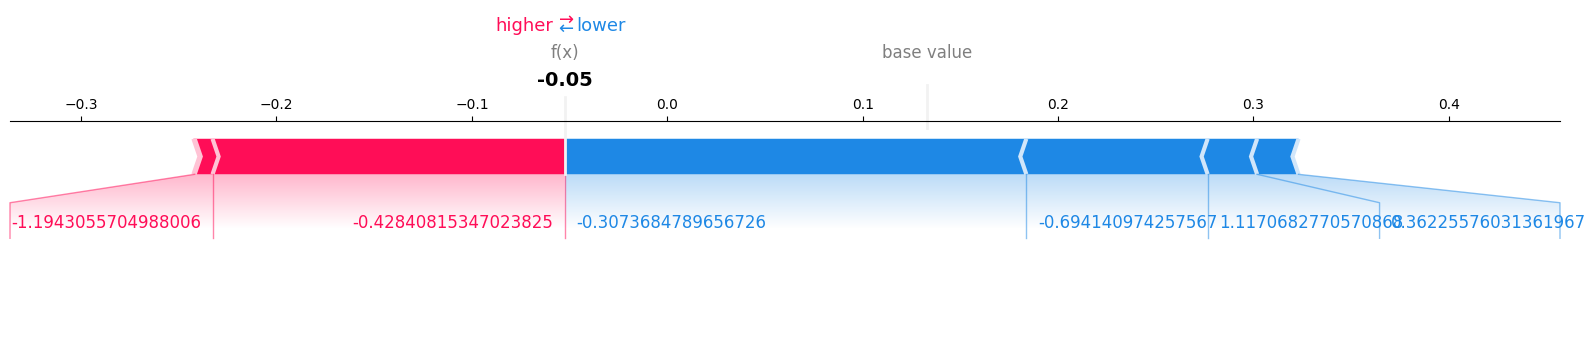

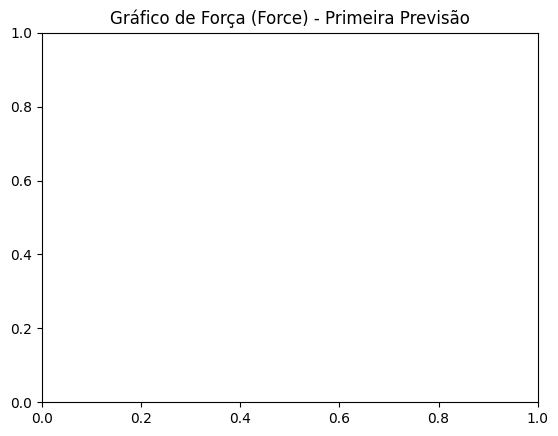

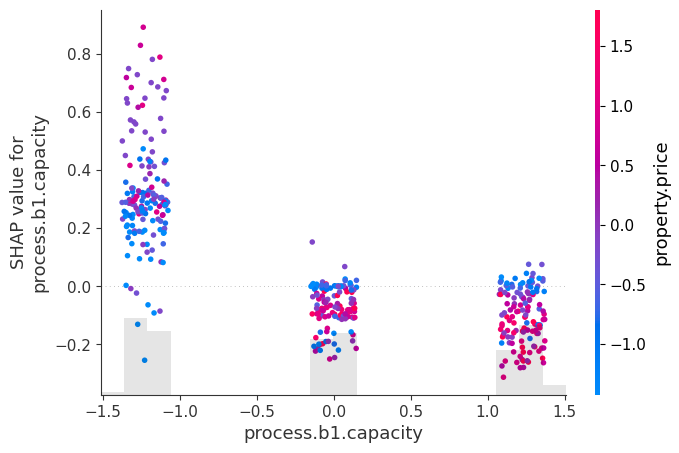

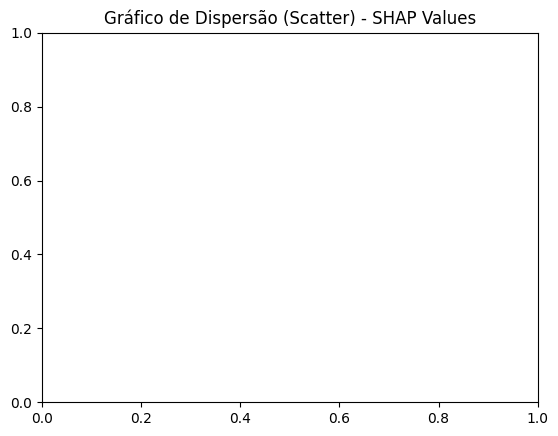

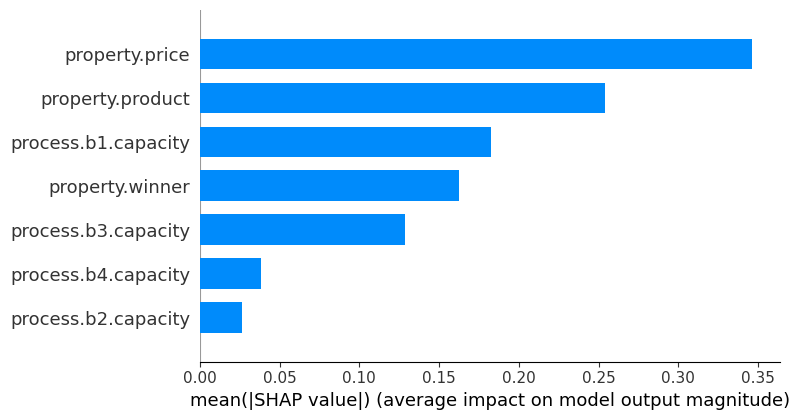

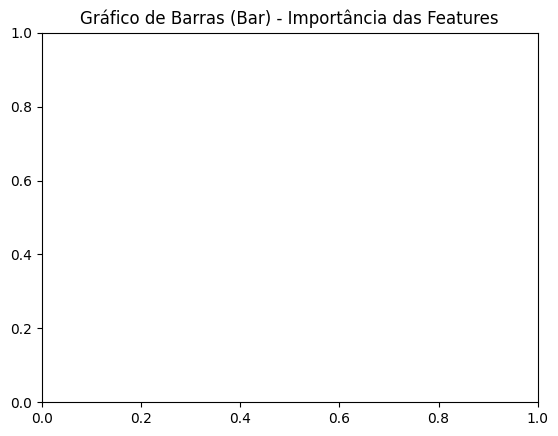

In [ ]:
# Instalar biblioteca SHAP
!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt

# Selecionar uma amostra do conjunto de dados para o KernelExplainer (usar um subconjunto por questões de desempenho)
X_sample = shap.sample(X_train, 100)

# Criar objeto explainer SHAP usando KernelExplainer
explainer = shap.KernelExplainer(best_mlp.predict, X_sample)
shap_values = explainer.shap_values(X_val, nsamples=100)

# Converter os shap_values para um objeto shap.Explanation
shap_values_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_val, feature_names=selected_features)

# Gráfico de "cascata" (waterfall)
shap.plots.waterfall(shap_values_explanation[0])
plt.title("Gráfico de Cascata (Waterfall) - Primeira Previsão")
plt.show()

# Gráfico de "força" (force)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val[0], matplotlib=True)
plt.title("Gráfico de Força (Force) - Primeira Previsão")
plt.show()

# Gráfico de "dispersão" (scatter)
shap.plots.scatter(shap_values_explanation[:, 0], color=shap_values_explanation)
plt.title("Gráfico de Dispersão (Scatter) - SHAP Values")
plt.show()

# Gráfico de "barras" (bar)
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=selected_features)
plt.title("Gráfico de Barras (Bar) - Importância das Features")
plt.show()


  0%|          | 0/409 [00:00<?, ?it/s]

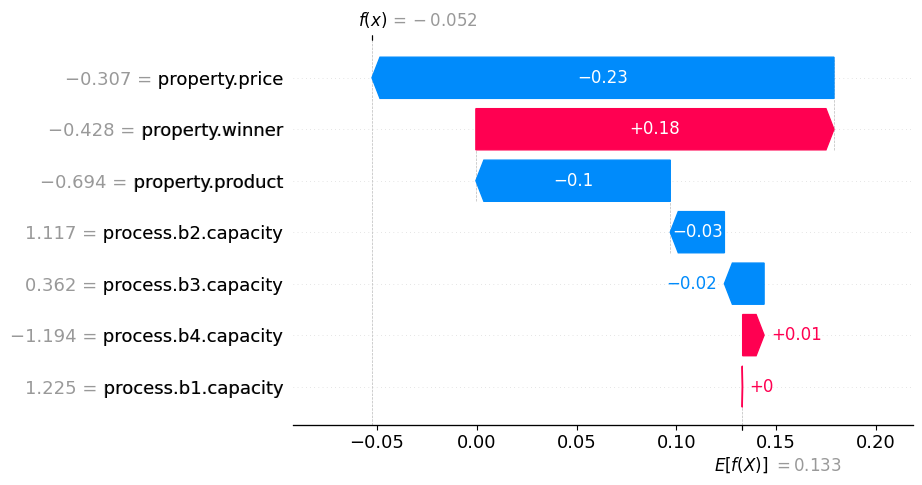

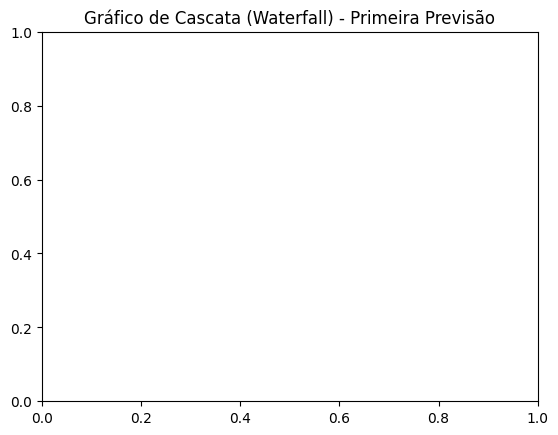

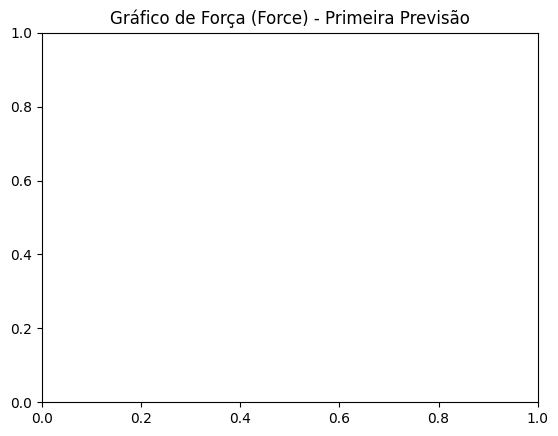

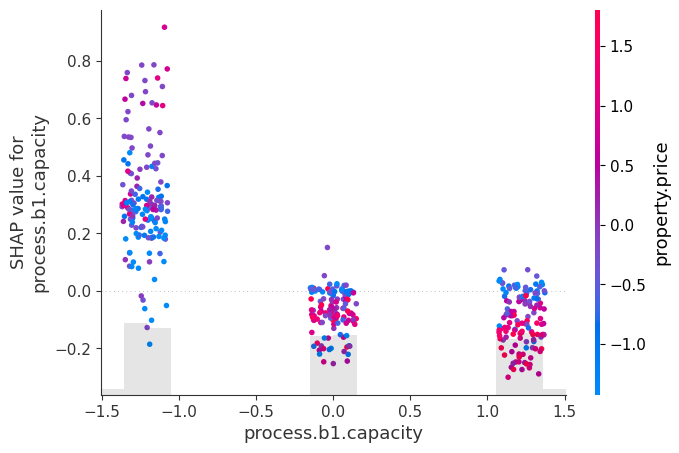

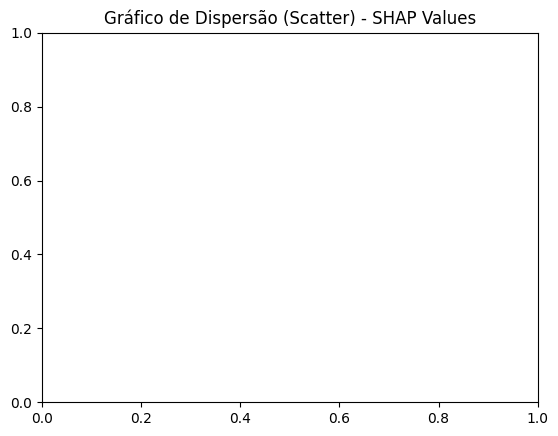

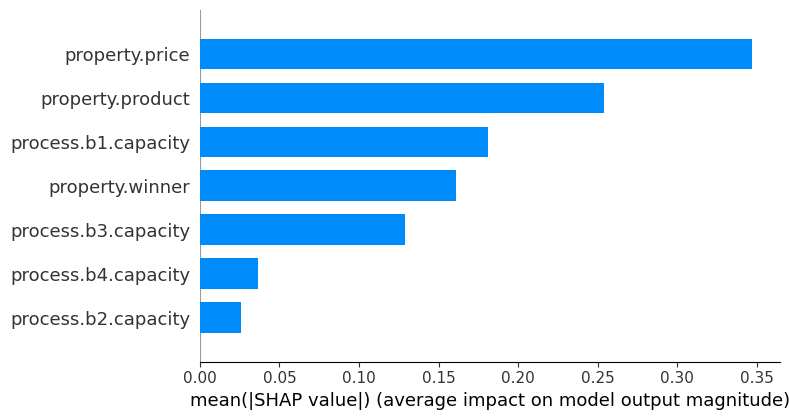

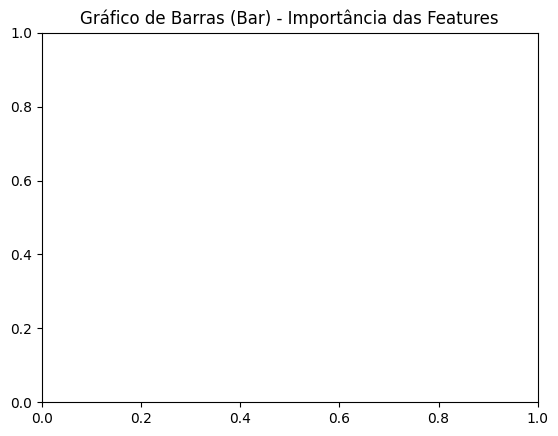

In [ ]:
# Instalar biblioteca SHAP
!pip install shap

import shap
import numpy as np
import matplotlib.pyplot as plt

# Selecionar uma amostra do conjunto de dados para o KernelExplainer (usar um subconjunto por questões de desempenho)
X_sample = shap.sample(X_train, 100)

# Criar objeto explainer SHAP usando KernelExplainer
explainer = shap.KernelExplainer(best_mlp.predict, X_sample)
shap_values = explainer.shap_values(X_val, nsamples=100)

# Converter os shap_values para um objeto shap.Explanation
shap_values_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_val, feature_names=selected_features)

# Gráfico de "cascata" (waterfall)
shap.initjs()
shap.plots.waterfall(shap_values_explanation[0])
plt.title("Gráfico de Cascata (Waterfall) - Primeira Previsão")
plt.show()

# Gráfico de "força" (force)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_val[0])
plt.title("Gráfico de Força (Force) - Primeira Previsão")
plt.show()

# Gráfico de "dispersão" (scatter)
shap.plots.scatter(shap_values_explanation[:, "process.b1.capacity"], color=shap_values_explanation)
plt.title("Gráfico de Dispersão (Scatter) - SHAP Values")
plt.show()

# Gráfico de "barras" (bar)
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=selected_features)
plt.title("Gráfico de Barras (Bar) - Importância das Features")
plt.show()
